In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [7]:
data = pd.read_csv('C:/Users/Sahil/Downloads/Salary_Data.csv')
data.head(10)

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0

In [8]:
data.shape

(30, 2)

In [9]:
data.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

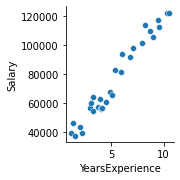

In [10]:
sns.pairplot(y_vars='Salary',x_vars='YearsExperience',data=data)

In [11]:
#for checking the correlation of the data
data.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

In [12]:
x =data['YearsExperience']
y=data['Salary']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [27]:
X_train.shape

(21,)

In [28]:
X_test.shape

(9,)

In [36]:
X_train_sm=sm.add_constant(X_train)
model= sm.OLS(y_train,X_train_sm).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Tue, 02 May 2023   Prob (F-statistic):           9.91e-14
Time:                        14:07:35   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

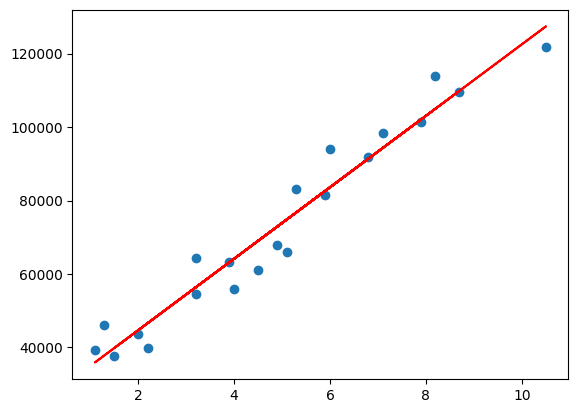

In [35]:
plt.scatter(X_train,y_train)
plt.plot(x_train,25200+X_train*9731.2038,'r')
plt.show()

In [39]:
y_train_pred=model.predict(X_train_sm)

In [40]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [41]:
residual=(y_train-y_train_pred)

In [42]:
residual.head()

17    6309.731871
22    -777.398108
11   -8333.703139
4    -6720.536230
29   -5508.528088
dtype: float64

<AxesSubplot:ylabel='Density'>

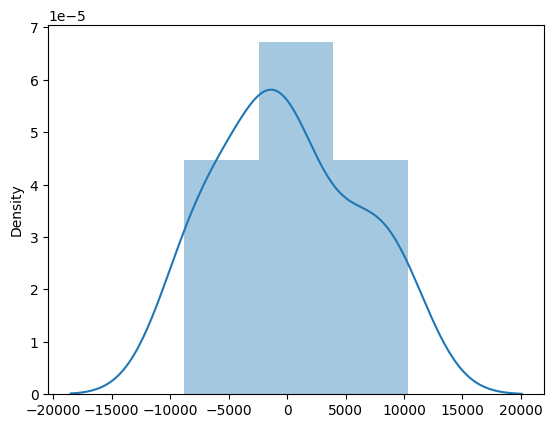

In [43]:
sns.distplot(residual)

<AxesSubplot:xlabel='YearsExperience'>

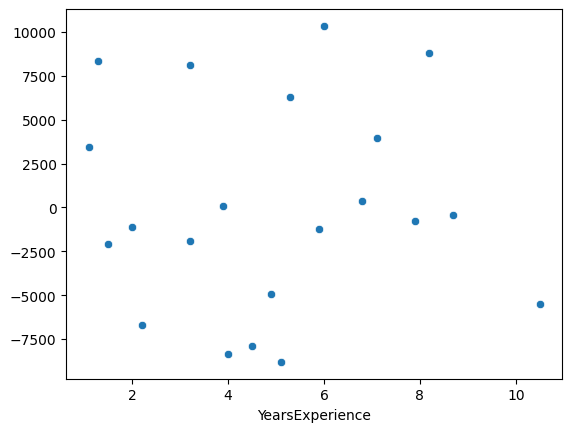

In [44]:
sns.scatterplot(x=X_train,y=residual)

In [45]:
X_test_sm=sm.add_constant(X_test)
y_pred=model.predict(X_test_sm)

In [46]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE
#RMSE(ROOT MEAN SQUARE ERRORp)

5505.479002176121

In [47]:
r2_score(y_test,y_pred)

0.9627668685473271

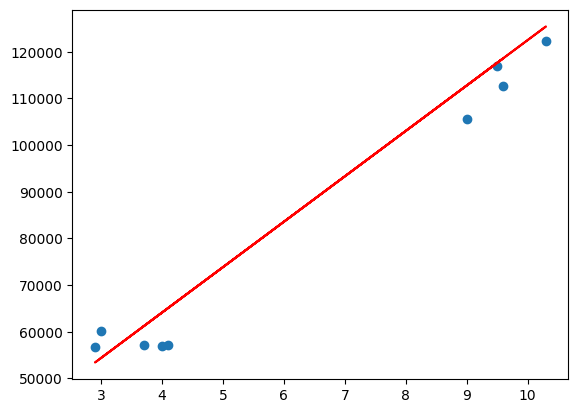

In [48]:
#line fitting
plt.scatter(X_test,y_test)
plt.plot(X_test,25200+X_test*9731.2038,'r')
plt.show()